In [1]:
import pandas as pd
marketing = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv", index_col=0)
marketing

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [2]:
## index_col = 0 is to use the first column in the data set as the index

## Objective - given money put into each of the channels, i.e. TV radio newspaper etc, determine sales this company made

## EDA

In [3]:
marketing.info() # look at structure of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
marketing.describe() # produce summaries

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


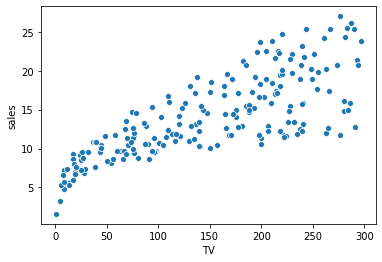

In [5]:
import seaborn as sns
sns.scatterplot(x="TV", y="sales", data=marketing)

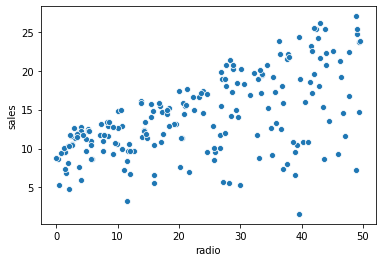

In [6]:
sns.scatterplot(x="radio", y="sales", data=marketing)

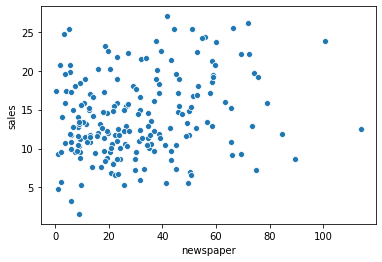

In [7]:
sns.scatterplot(x="newspaper", y="sales", data=marketing)

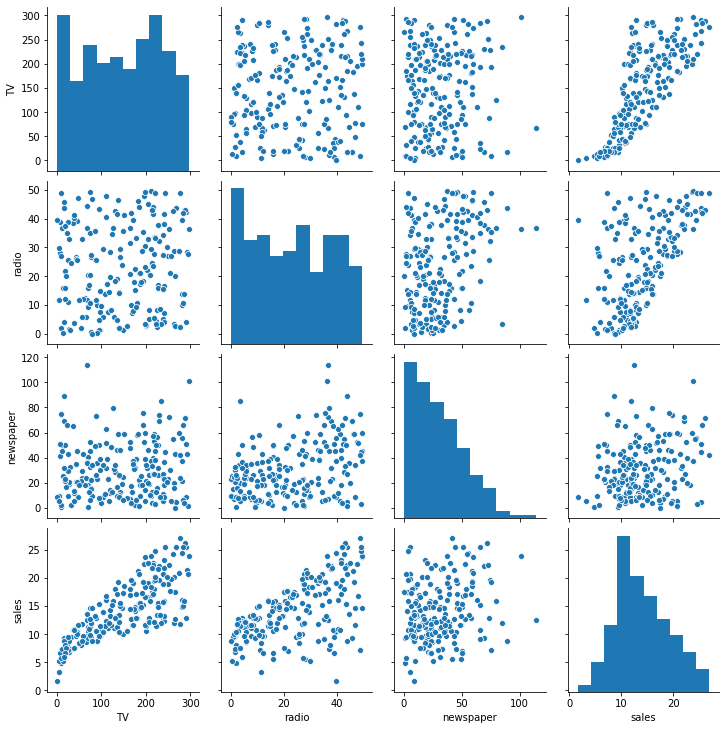

In [13]:
sns.pairplot(marketing)

### Target Feature Selection

In [8]:
#Target
y = marketing["sales"]

#Features
X = marketing[["TV","radio","newspaper"]]

### Test Train Split

In [10]:
from sklearn.model_selection import train_test_split

## allocate 70% at random to training data - to train the model to understand how to predict sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Linear Regression Model

In [11]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg ##untrained model reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
## training... fit 
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
##Predictions

In [16]:
new_week = pd.DataFrame({
    "TV":[250]
    ,"radio":[20]
    ,"newspaper":[100]
})
new_week ##below shows predicted sales for the setup above, i.e TV 250, radio 20 newspaper 100

,TV,radio,newspaper
0,250,20,100


In [17]:
reg.predict(new_week) ## predicted sales for the above combination is 18.39 as below

array([18.39776449])

In [20]:
## are our predictions any good? validation
## make predictions on X_test.... we already know the values... theya re the values in y_test

preds = reg.predict(X_test)
preds

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [21]:
y_test

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
116    12.6
70     22.3
171     8.4
175    11.5
46     14.9
67      9.5
183     8.7
166    11.9
79      5.3
187    10.3
178    11.7
57      5.5
153    16.6
83     11.3
69     18.9
125    19.7
17     12.5
149    10.9
94     22.2
66      9.3
61      8.1
85     21.7
68     13.4
126    10.6
133     5.7
10     10.6
19     11.3
56     23.7
76      8.7
151    16.1
105    20.7
136    11.6
138    20.8
165    11.9
77      6.9
80     11.0
198    12.8
39     10.1
25      9.7
123    11.6
196     7.6
30     10.5
20     14.6
144    10.4
87     12.0
115    14.6
174    11.7
6       7.2
127     6.6
118     9.4
74     11.0
141    10.9
99     25.4
173     7.6
97     11.7
Name: sales, dtype: float64

In [22]:
## compare actual sales to predicted sales
## creates a dataframe of y_test and predicted sales preds
evaluate = pd.DataFrame({
    "actual" : y_test
    , "predicted" : preds
})

evaluate["error"] = evaluate["actual"] - evaluate["predicted"]

evaluate.head()

,actual,predicted,error
96,16.9,16.565396,0.334604
16,22.4,21.188228,1.211772
31,21.4,21.551071,-0.151071
159,7.3,10.889238,-3.589238
129,24.7,22.202320,2.497680


In [23]:
## Industry standard is to calculate a mean sqaure error (MSE)

evaluate["squared_error"] = evaluate["error"]**2 ## sqaured of errors
mse = evaluate["squared_error"].mean() ## mean of the squared errors gives mse
print(mse) 


3.796797236715219


In [24]:
## MSE using sklearn.metrics

from sklearn import metrics
print("MSE = " + str(metrics.mean_squared_error(preds, y_test)))

MSE = 3.79679723671522


In [25]:
## Root-mean squared error is on the orginal scale of sales so is more interpretatable.
print("RMSE = " + str(metrics.mean_squared_error(preds, y_test, squared=False)))

RMSE = 1.9485372043446387
